<a href="https://colab.research.google.com/github/k-chanez/Churn-prediction/blob/dev_amel/Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openpyxl


In [ ]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn

     ------------------------------------ 293.3/293.3 kB 452.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn


     ---------------------------------------- 7.1/7.1 MB 627.2 kB/s eta 0:00:00
     -------------------------------------- 34.1/34.1 MB 466.3 kB/s eta 0:00:00
     ------------------------------------ 302.2/302.2 kB 467.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [ ]:


# Charger le jeu de données à partir du fichier local
file_path = r'C:/Users/Admin/Downloads/E Commerce Dataset.xlsx'
df = pd.read_excel(file_path)

# Afficher les premières lignes du DataFrame pour vérifier le chargement
print(df.head())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [ ]:
# Aperçu des données
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore 

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.shape

(5630, 20)

In [ ]:
# Informations sur le dataframe
print("\nInformations sur le dataframe :")
print(df.info())


Informations sur le dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null 

In [ ]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())


Statistiques descriptives :
         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999  

In [ ]:

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())


Valeurs manquantes :
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


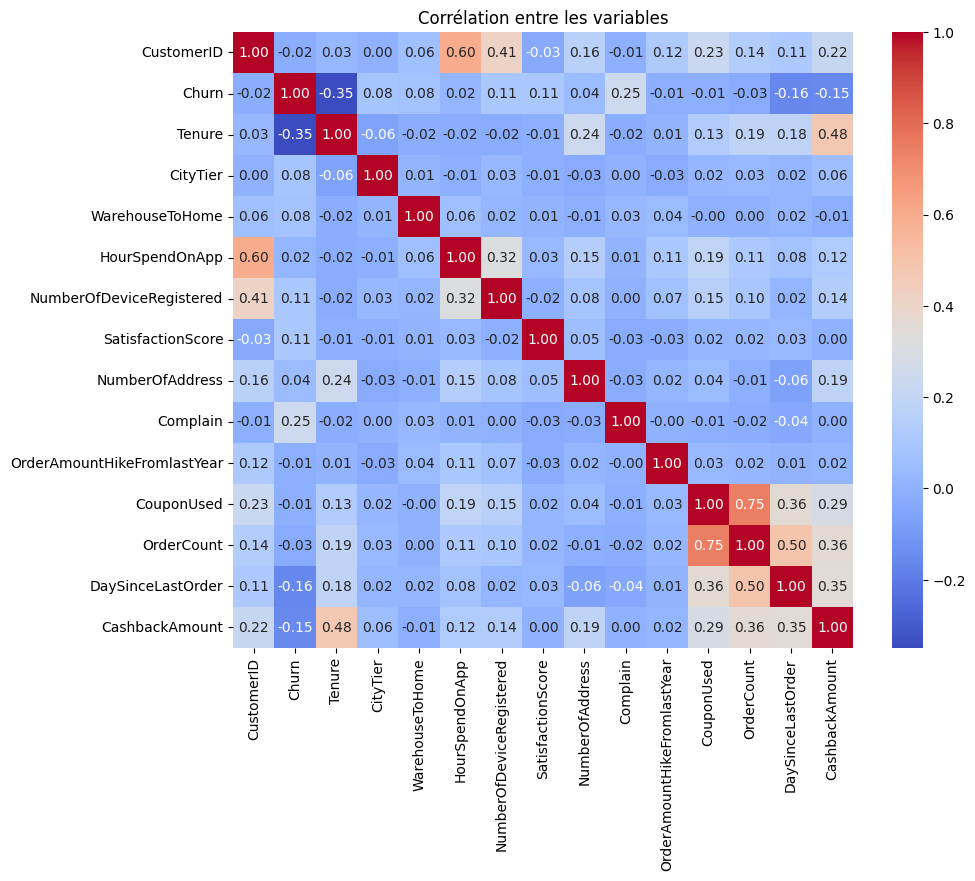

In [ ]:

# Visualisation des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()

In [ ]:
# Vérifier les valeurs manquantes par colonne
missing_values = df.isnull().sum()


In [ ]:
# Afficher les colonnes avec des valeurs manquantes (si applicable)
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("Colonnes avec des valeurs manquantes :")
    print(missing_columns)
else:
    print("Aucune valeur manquante dans le dataframe.")

Colonnes avec des valeurs manquantes :
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64


In [ ]:
# Calculer le pourcentage de valeurs manquantes par colonne
percentage_missing = (df.isnull().sum() / len(df)) * 100

# Créer un dataframe pour afficher les résultats
missing_data = pd.DataFrame({'Total Missing Values': df.isnull().sum(), 'Percentage Missing': percentage_missing})

In [ ]:
# Afficher le dataframe des valeurs manquantes (si applicable)
if not missing_data[missing_data['Total Missing Values'] > 0].empty:
    print("Pourcentage de valeurs manquantes par colonne :")
    print(missing_data[missing_data['Total Missing Values'] > 0])
else:
    print("Aucune valeur manquante dans le dataframe.")

Pourcentage de valeurs manquantes par colonne :
                             Total Missing Values  Percentage Missing
Tenure                                        264            4.689165
WarehouseToHome                               251            4.458259
HourSpendOnApp                                255            4.529307
OrderAmountHikeFromlastYear                   265            4.706927
CouponUsed                                    256            4.547069
OrderCount                                    258            4.582593
DaySinceLastOrder                             307            5.452931


<bound method DataFrame.info of       CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0          50001      1       4         3                6               3   
1          50002      1       9         1                8               3   
2          50003      1       9         1               30               2   
3          50004      1       0         3               15               2   
4          50005      1       0         1               12               3   
...          ...    ...     ...       ...              ...             ...   
5625       55626      0      10         1               30               3   
5626       55627      0      13         1               13               3   
5627       55628      0       1         1               11               3   
5628       55629      0      23         3                9               4   
5629       55630      0       8         1               15               3   

      NumberOfDeviceRegistered 

Data exploration

In [ ]:
# Calculer la corrélation entre les variables numériques et la colonne 'Churn'
correlation_matrix = df.corr()
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Afficher la corrélation
print("Corrélation avec 'Churn':")
print(correlation_with_churn)


Corrélation avec 'Churn':
Churn                                    1.000000
Complain                                 0.257002
MaritalStatus_Single                     0.181375
PreferedOrderCat_Mobile Phone            0.154193
NumberOfDeviceRegistered                 0.117202
PreferedOrderCat_Mobile                  0.111911
SatisfactionScore                        0.109206
PreferredPaymentMode_COD                 0.087636
CityTier                                 0.087538
PreferredLoginDevice_Phone               0.077592
WarehouseToHome                          0.067869
PreferredPaymentMode_E wallet            0.062421
NumberOfAddress                          0.043762
Gender_Male                              0.032623
HourSpendOnApp                           0.023935
PreferredPaymentMode_UPI                 0.004710
OrderAmountHikeFromlastYear             -0.000049
CouponUsed                              -0.001569
PreferredPaymentMode_Cash on Delivery   -0.011588
OrderCount              

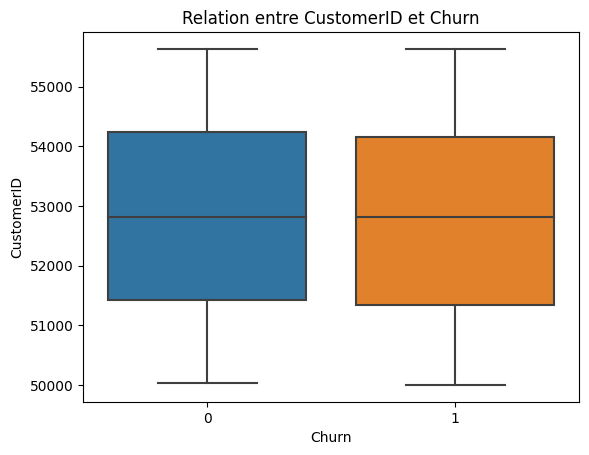

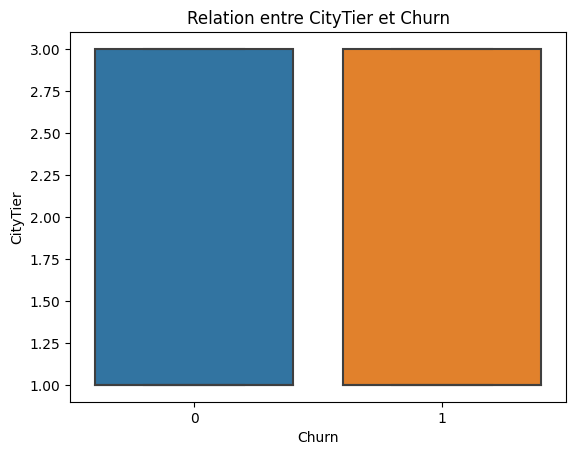

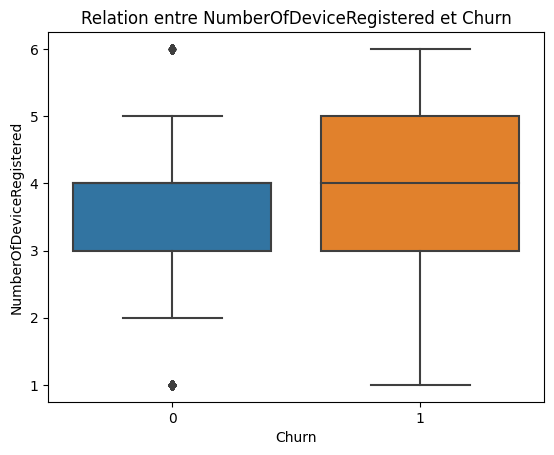

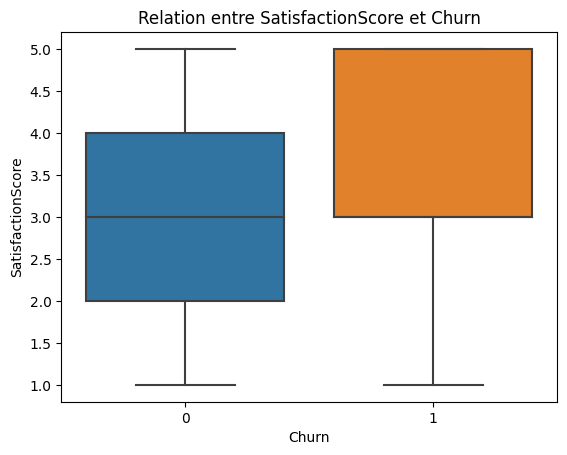

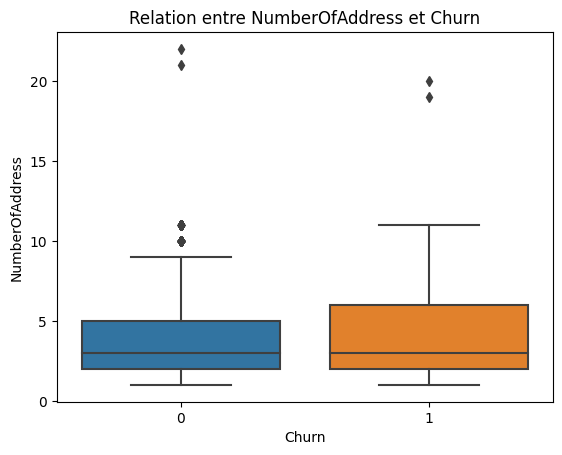

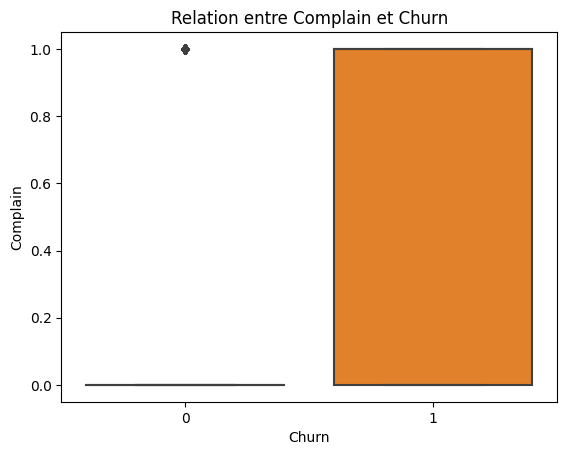

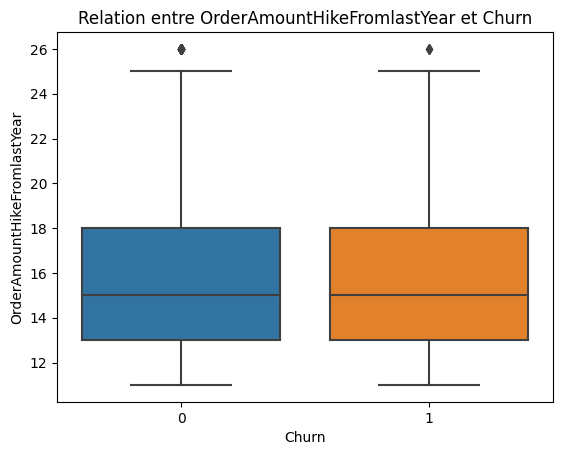

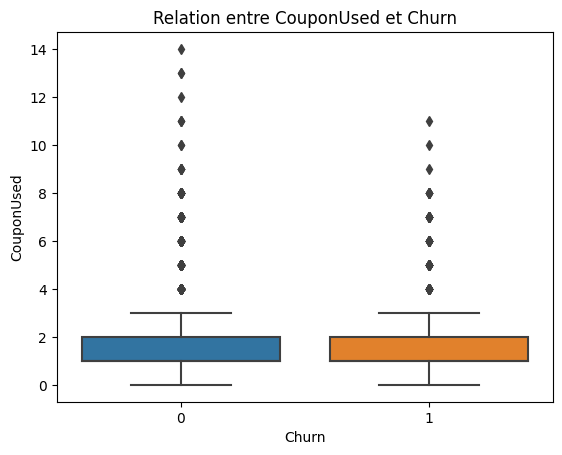

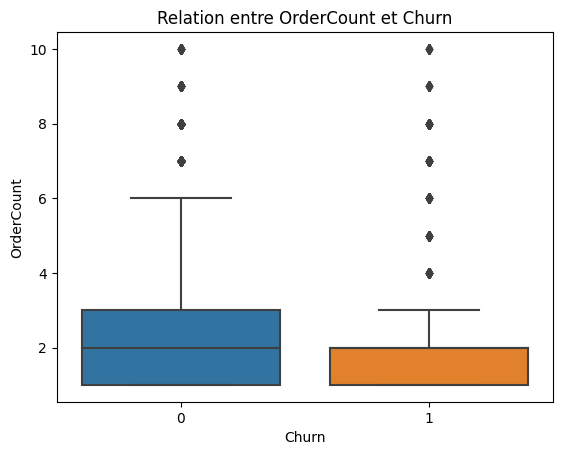

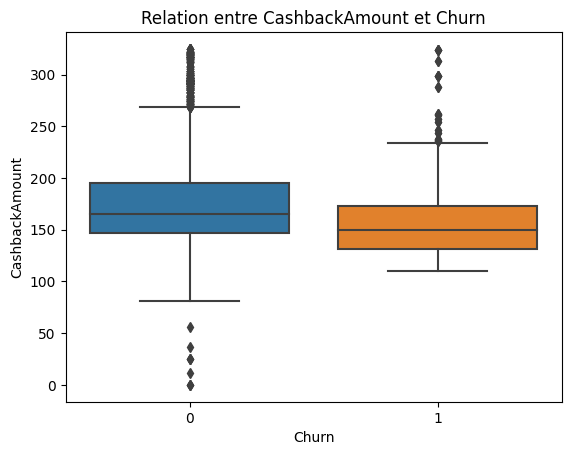

In [ ]:
# Visualiser la relation entre chaque variable numérique et 'Churn'
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols[num_cols != 'Churn']  # Exclure la colonne cible
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Relation entre {col} et Churn')
    plt.show()

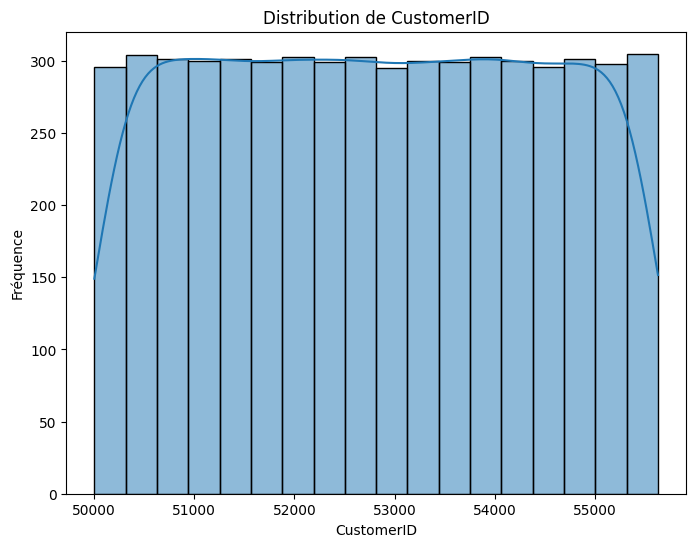

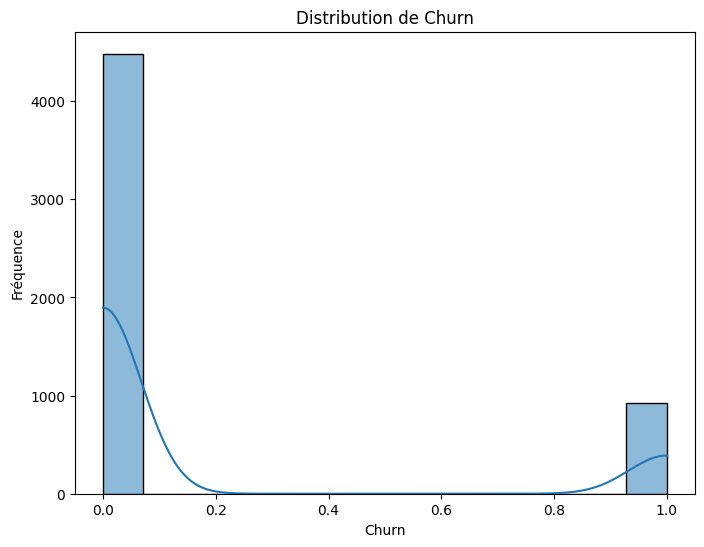

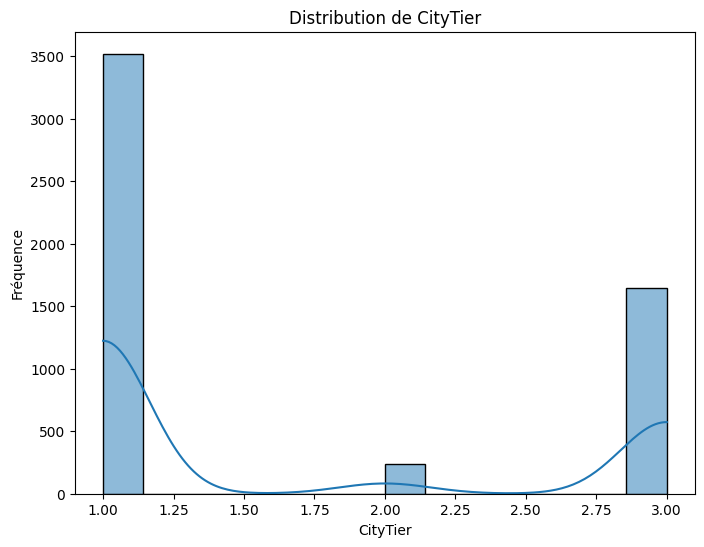

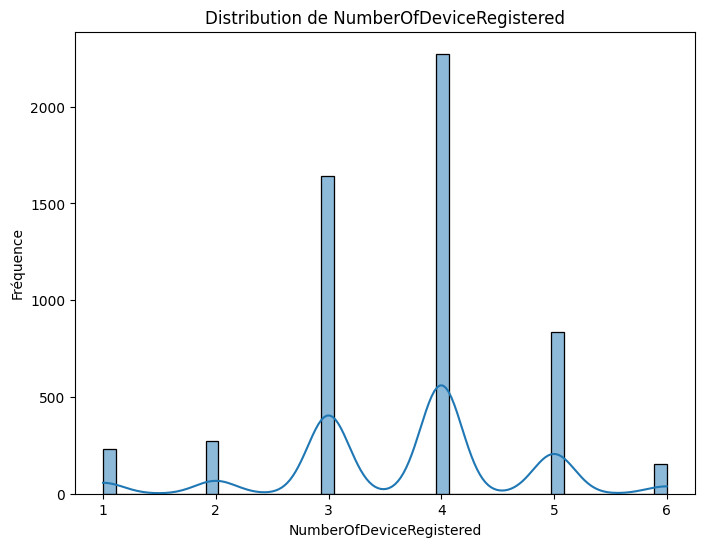

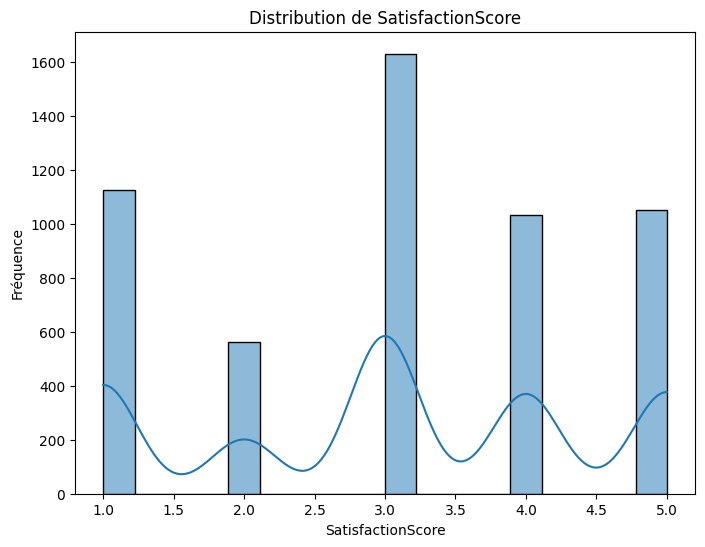

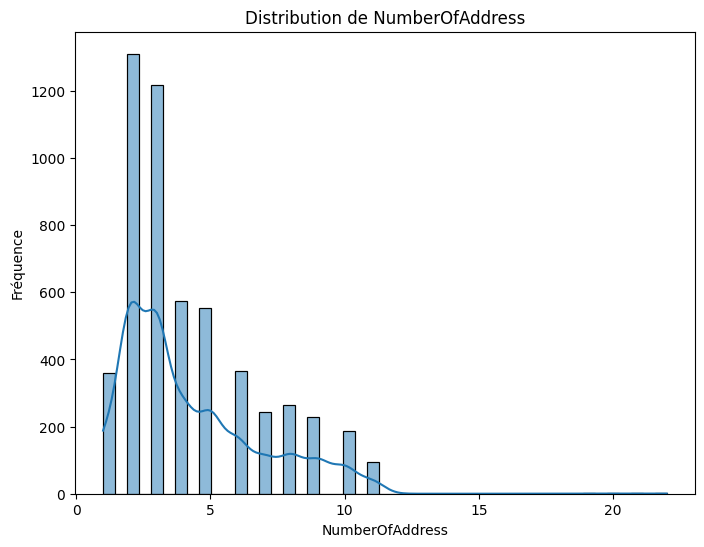

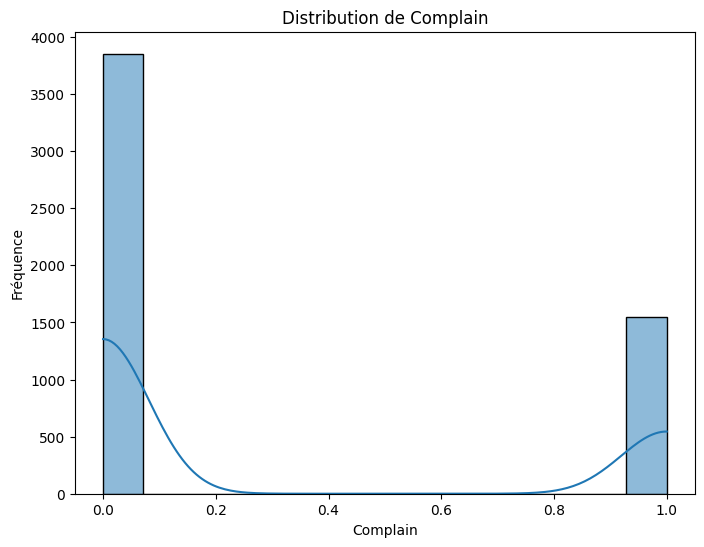

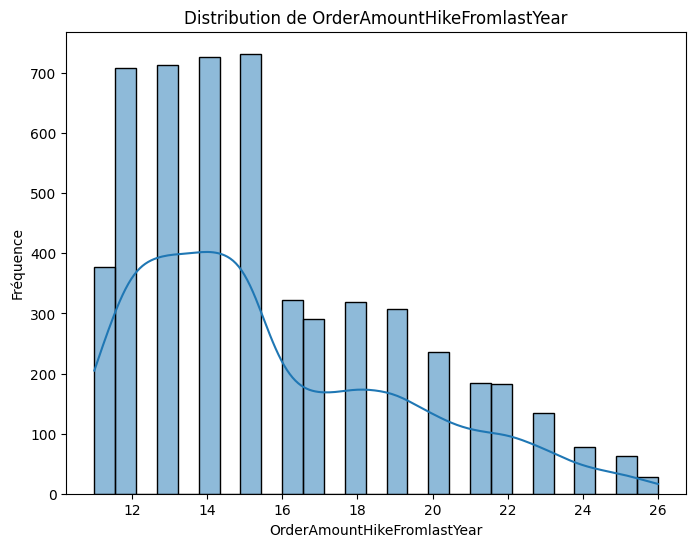

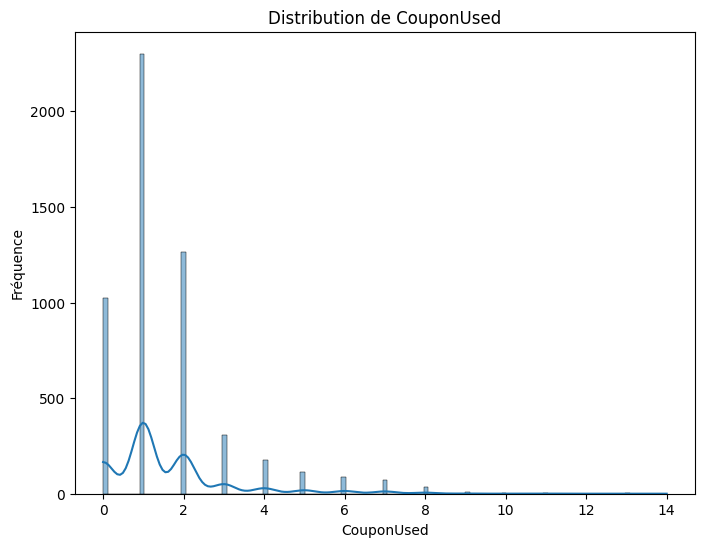

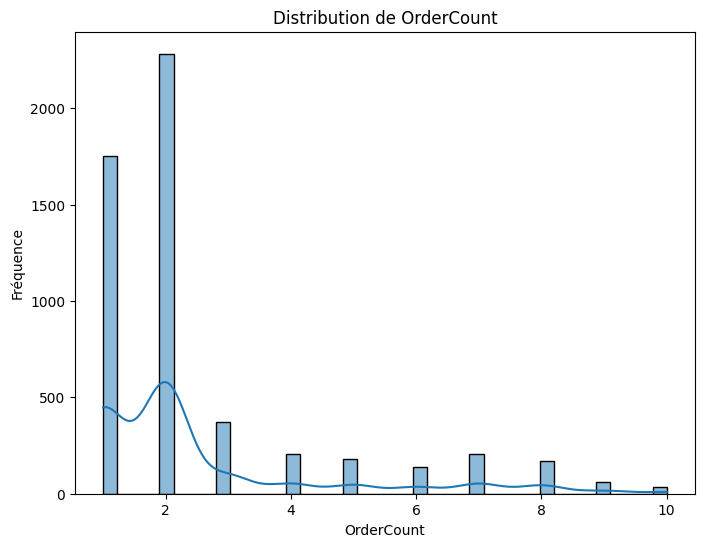

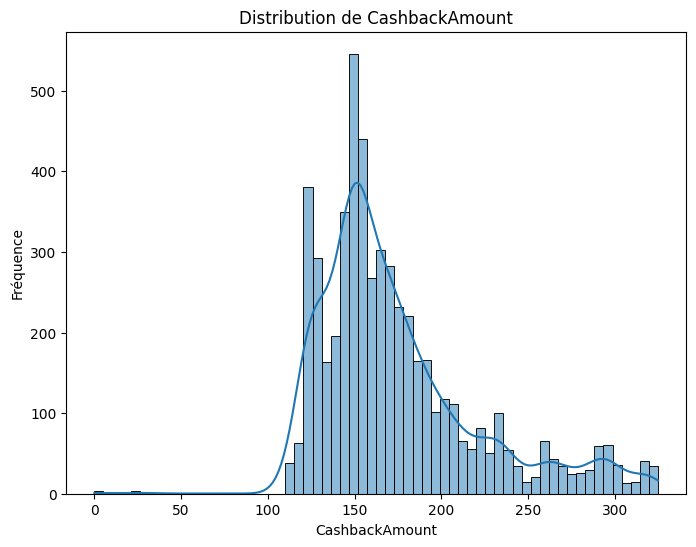

In [ ]:
# Sélectionner les colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Afficher des histogrammes pour les colonnes numériques
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

Quelle situation familliale à le taux le plus élevé de churn ?

In [ ]:

df.groupby('Churn')['MaritalStatus_Single'].value_counts()

Churn  MaritalStatus_Single
0      0                       3213
       1                       1270
1      1                        468
       0                        452
Name: MaritalStatus_Single, dtype: int64

In [ ]:
# Calculer le pourcentage de 'Single', 'Married' et 'Divorced' pour chaque groupe 'Churn'
result = df.groupby('Churn')['MaritalStatus_Single'].value_counts(normalize=True) * 100

# Afficher les résultats
print(result)

Churn  MaritalStatus_Single
0      0                       71.670756
       1                       28.329244
1      1                       50.869565
       0                       49.130435
Name: MaritalStatus_Single, dtype: float64


In [ ]:
# Traitement des valeurs manquantes
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
# Traitement des valeurs manquantes
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)  # Remplacez par la médiane ou autre stratégie


In [ ]:

# Affichage du dataframe après le nettoyage
print("DataFrame après le nettoyage :")
print(df.info())

DataFrame après le nettoyage :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   int64   
 2   Tenure                       5630 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   object  
 4   CityTier                     5630 non-null   int64   
 5   WarehouseToHome              5630 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   object  
 7   Gender                       5630 non-null   object  
 8   HourSpendOnApp               5630 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   int64   
 10  PreferedOrderCat             5630 non-null   object  
 11  SatisfactionScore            5630 non-null   int64   
 12  MaritalStatus                56

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
# Convertir les variables catégorielles en variables indicatrices
df = pd.get_dummies(df, columns=['MaritalStatus'], drop_first=True)

In [ ]:
# Convertir les colonnes nécessaires en types de données appropriés
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')
df['HourSpendOnApp'] = pd.to_numeric(df['HourSpendOnApp'], errors='coerce')
df['SatisfactionScore'] = pd.to_numeric(df['SatisfactionScore'], errors='coerce')

# Afficher la dataset nettoyée
print(df)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1       4         Mobile Phone         3   
1          50002      1       9                Phone         1   
2          50003      1       9                Phone         1   
3          50004      1       0                Phone         3   
4          50005      1       0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0      10             Computer         1   
5626       55627      0      13         Mobile Phone         1   
5627       55628      0       1         Mobile Phone         1   
5628       55629      0      23             Computer         3   
5629       55630      0       8         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                   6           Debit Card  Female               3   
1                   8                  UPI    Male               3 

In [ ]:

# Supprimer les lignes avec des valeurs manquantes pour permettre l'entraînement du modèle
df = df.dropna()

In [ ]:
print(df.columns)


Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others'],
      dtype='object')


In [ ]:
# Convertir les variables catégorielles en variables indicatrices
df = pd.get_dummies(df, columns=['PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Debit Card', 'Gender_Male', 'PreferedOrderCat_Laptop & Accessory', 'MaritalStatus_Single'], drop_first=True)


In [ ]:
import numpy as np

In [ ]:

# colonnes categoricales
data_cat = df[df.select_dtypes(exclude=np.number).columns]
data_cat

""
0
1
2
3
4
...
5625
5626
5627
5628


In [ ]:
# correlation
corr_matrix = df.corr()
corr_matrix

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,PreferredLoginDevice_Mobile Phone_1,PreferredPaymentMode_Debit Card_1,Gender_Male_1,PreferedOrderCat_Laptop & Accessory_1,MaritalStatus_Single_1
CustomerID,1.000000,-0.018252,0.034437,0.001790,0.061885,0.582045,0.410505,-0.034079,0.160760,-0.014717,...,0.009605,0.000517,-0.361939,0.301418,-0.004359,0.210894,0.004170,0.002852,0.008514,-0.009986
Churn,-0.018252,1.000000,-0.335293,0.087538,0.067869,0.023935,0.117202,0.109206,0.043762,0.257002,...,0.004710,-0.089895,0.111911,0.154193,-0.059337,-0.116215,-0.039207,0.032623,-0.137569,0.181375
Tenure,0.034437,-0.335293,1.000000,-0.062387,-0.009613,-0.019569,-0.030909,-0.022995,0.236381,-0.017737,...,-0.032328,0.349256,-0.160690,-0.223300,0.252696,0.198064,0.019498,-0.050904,-0.032762,-0.119459
CityTier,0.001790,0.087538,-0.062387,1.000000,0.020717,-0.007056,0.020517,-0.017476,-0.035773,0.000335,...,-0.031184,0.007562,-0.129148,-0.191140,-0.040860,0.121859,-0.116024,-0.022825,0.230491,0.018131
WarehouseToHome,0.061885,0.067869,-0.009613,0.020717,1.000000,0.063794,0.019929,0.008871,-0.000722,0.024964,...,-0.010304,0.042734,-0.055279,-0.020713,-0.066008,0.006047,-0.020558,0.000380,0.043256,-0.027948
HourSpendOnApp,0.582045,0.023935,-0.019569,-0.007056,0.063794,1.000000,0.304040,0.026853,0.139902,0.005544,...,-0.027087,-0.049944,-0.180038,0.243512,-0.029471,0.140532,0.022480,-0.012866,-0.037980,-0.041088
NumberOfDeviceRegistered,0.410505,0.117202,-0.030909,0.020517,0.019929,0.304040,1.000000,-0.008471,0.084686,0.000175,...,0.008479,-0.046606,-0.213756,0.178744,0.022475,0.113091,-0.004038,-0.026495,-0.008559,0.041936
SatisfactionScore,-0.034079,0.109206,-0.022995,-0.017476,0.008871,0.026853,-0.008471,1.000000,0.054534,-0.035192,...,0.015032,-0.020089,0.004851,0.007088,-0.001622,-0.014915,-0.060935,-0.029689,-0.012888,-0.014904
NumberOfAddress,0.160760,0.043762,0.236381,-0.035773,-0.000722,0.139902,0.084686,0.054534,1.000000,-0.030448,...,0.005919,0.056999,-0.151024,-0.031477,0.061509,0.129371,-0.002149,-0.025384,0.052933,-0.007976
Complain,-0.014717,0.257002,-0.017737,0.000335,0.024964,0.005544,0.000175,-0.035192,-0.030448,1.000000,...,0.023159,0.015610,0.005819,0.010726,-0.010891,0.003822,-0.007849,-0.038984,-0.023742,-0.002272


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Séparer les features (X) et la variable cible (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Diviser le dataset en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les features, si nécessaire (par exemple, pour les modèles basés sur les distances comme SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser les modèles
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
mlp_classifier = MLPClassifier(random_state=42)

# Liste des modèles à tester
models = [random_forest, gradient_boosting, mlp_classifier]

# Entraîner et évaluer chaque modèle
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

Model: RandomForestClassifier
Accuracy: 0.96577243293247
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       0.98      0.81      0.89       178

    accuracy                           0.97      1081
   macro avg       0.97      0.90      0.93      1081
weighted avg       0.97      0.97      0.96      1081

Model: GradientBoostingClassifier
Accuracy: 0.9195189639222942
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       903
           1       0.82      0.65      0.73       178

    accuracy                           0.92      1081
   macro avg       0.88      0.81      0.84      1081
weighted avg       0.92      0.92      0.92      1081

Model: MLPClassifier
Accuracy: 0.9518963922294172
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       90

C:\Users\Admin\anaconda3\envs\rstudio\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy (Précision) : le rapport du nombre de prédictions correctes sur le nombre total de prédictions.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9518963922294172